## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [59]:
import pandas as pd

Link for the data<br/>
`https://drive.google.com/file/d/19iWVGLBi7edqybybam56bt2Zy7vpf1Xc/view?usp=sharing`

In [60]:
df = pd.read_csv("./data/train.csv")

#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
train, test = train_test_split(df, test_size=0.2)

### Exploration

In [63]:
print("Shape of the data: ", train.shape)
print(df.dtypes)

Shape of the data:  (323432, 6)
id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object


In [64]:
train.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
241057,241057,9769,353008,Which is the best speech you ever heard?,What are some of the best speeches you have he...,1
138612,138612,214731,220679,Did Joseph Goebbels read many books?,Was Joseph Goebbels an avid reader?,1
139988,139988,21863,222535,How do I tell her I love her?,How do I tell her I don't love her the way she...,0
29069,29069,39192,1296,What happens if you burn 1000 calories a day?,Is it possible to burn 1000 calories each day?...,0
51205,51205,90866,90867,How much Oxygen does an average person need in...,How many hairs does the average person lose pe...,0


In [65]:
train.describe()

,id,qid1,qid2,is_duplicate
count,323432.000000,323432.000000,323432.000000,323432.000000
mean,201901.858684,216926.058362,220689.600911,0.369583
std,116707.119368,157660.428282,159743.675875,0.482693
min,0.000000,1.000000,2.000000,0.000000
25%,100755.750000,74188.500000,74605.000000,0.000000
50%,201786.000000,191692.000000,196778.000000,0.000000
75%,302920.250000,346065.000000,353930.750000,1.000000
max,404288.000000,537930.000000,537931.000000,1.000000


In [66]:
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [67]:
# remove null values
train = train.dropna()

In [68]:
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [69]:
train.shape

(323429, 6)

<AxesSubplot:xlabel='is_duplicate'>

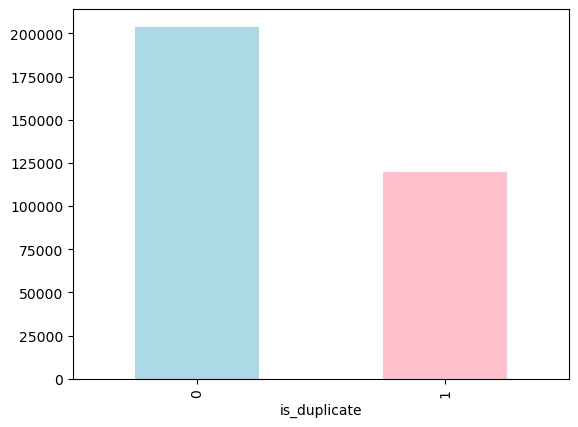

In [304]:
# plot count of is_duplicate 1 vs 0
import matplotlib.pyplot as plt

# 1 is duplicate and 0 is not duplicate and different color 1 is blue and 0 is red
train.groupby("is_duplicate")["id"].count().plot.bar(color=['lightblue', 'pink'])


### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

#### Tokenization

In [70]:
# tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Verma
[nltk_data]     Ashiyaan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
train['tokens1'] = train['question1'].apply(word_tokenize)
train['tokens2'] = train['question2'].apply(word_tokenize)

train.head()

,id,qid1,qid2,question1,question2,is_duplicate,tokens1,tokens2
298900,298900,132471,44677,What are some lesser known facts about PM Nare...,What are some lesser known facts/incidents rel...,1,"[What, are, some, lesser, known, facts, about,...","[What, are, some, lesser, known, facts/inciden..."
101435,101435,168039,168040,How do I use PC's internet connection on Andro...,Can I use net on my Android phone from cable b...,0,"[How, do, I, use, PC, 's, internet, connection...","[Can, I, use, net, on, my, Android, phone, fro..."
349253,349253,226755,5914,How do you delete your Yahoo email account?,How can you delete your Yahoo mail account?,1,"[How, do, you, delete, your, Yahoo, email, acc...","[How, can, you, delete, your, Yahoo, mail, acc..."
68381,68381,118184,118185,What is the real world?,What is out there in the real world?,0,"[What, is, the, real, world, ?]","[What, is, out, there, in, the, real, world, ?]"
102409,102409,169441,169442,Why do artists/musicians/actors etc tend to be...,What is the future of left wing politics in In...,0,"[Why, do, artists/musicians/actors, etc, tend,...","[What, is, the, future, of, left, wing, politi..."


In [257]:
test['tokens1'] = test['question1'].apply(word_tokenize)
test['tokens2'] = test['question2'].apply(word_tokenize)

#### Stopwords cleaning

In [72]:
# stopwords cleaning
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Verma
[nltk_data]     Ashiyaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# function to remove stopwords
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

In [74]:
train['tokens1'] = train['tokens1'].apply(remove_stopwords)
train['tokens2'] = train['tokens2'].apply(remove_stopwords)

train.head()

,id,qid1,qid2,question1,question2,is_duplicate,tokens1,tokens2
298900,298900,132471,44677,What are some lesser known facts about PM Nare...,What are some lesser known facts/incidents rel...,1,"[What, lesser, known, facts, PM, Narendra, Mod...","[What, lesser, known, facts/incidents, related..."
101435,101435,168039,168040,How do I use PC's internet connection on Andro...,Can I use net on my Android phone from cable b...,0,"[How, I, use, PC, 's, internet, connection, An...","[Can, I, use, net, Android, phone, cable, broa..."
349253,349253,226755,5914,How do you delete your Yahoo email account?,How can you delete your Yahoo mail account?,1,"[How, delete, Yahoo, email, account, ?]","[How, delete, Yahoo, mail, account, ?]"
68381,68381,118184,118185,What is the real world?,What is out there in the real world?,0,"[What, real, world, ?]","[What, real, world, ?]"
102409,102409,169441,169442,Why do artists/musicians/actors etc tend to be...,What is the future of left wing politics in In...,0,"[Why, artists/musicians/actors, etc, tend, lef...","[What, future, left, wing, politics, India, ?]"


In [258]:
test['tokens1'] = test['tokens1'].apply(remove_stopwords)
test['tokens2'] = test['tokens2'].apply(remove_stopwords)

#### Removing punctuation

In [75]:
# removing punctuations
import string

In [76]:
def remove_punctuations(text):
    return [word for word in text if word not in string.punctuation]

In [77]:
train['tokens1'] = train['tokens1'].apply(remove_punctuations)
train['tokens2'] = train['tokens2'].apply(remove_punctuations)

In [259]:
test['tokens1'] = test['tokens1'].apply(remove_punctuations)
test['tokens2'] = test['tokens2'].apply(remove_punctuations)

#### Normalizing

In [78]:
# normalization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Verma
[nltk_data]     Ashiyaan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [80]:
train['tokens1'] = train['tokens1'].apply(word_lemmatizer)
train['tokens2'] = train['tokens2'].apply(word_lemmatizer)

In [260]:
test['tokens1'] = test['tokens1'].apply(word_lemmatizer)
test['tokens2'] = test['tokens2'].apply(word_lemmatizer)

#### Stemming

In [81]:
# stemming
from nltk.stem import PorterStemmer

In [82]:
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [83]:
train['tokens1'] = train['tokens1'].apply(word_stemmer)
train['tokens2'] = train['tokens2'].apply(word_stemmer)

train.head()

,id,qid1,qid2,question1,question2,is_duplicate,tokens1,tokens2
298900,298900,132471,44677,What are some lesser known facts about PM Nare...,What are some lesser known facts/incidents rel...,1,what lesser known fact pm narendra modi,what lesser known facts/incid relat narendra modi
101435,101435,168039,168040,How do I use PC's internet connection on Andro...,Can I use net on my Android phone from cable b...,0,how i use pc 's internet connect android phone...,can i use net android phone cabl broadband con...
349253,349253,226755,5914,How do you delete your Yahoo email account?,How can you delete your Yahoo mail account?,1,how delet yahoo email account,how delet yahoo mail account
68381,68381,118184,118185,What is the real world?,What is out there in the real world?,0,what real world,what real world
102409,102409,169441,169442,Why do artists/musicians/actors etc tend to be...,What is the future of left wing politics in In...,0,whi artists/musicians/actor etc tend left wing...,what futur left wing polit india


In [261]:
test['tokens1'] = test['tokens1'].apply(word_stemmer)
test['tokens2'] = test['tokens2'].apply(word_stemmer)

### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

In [121]:
# word2vec
import multiprocessing
from gensim.models import Word2Vec

In [122]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [265]:
sentences = train['tokens1'].tolist() + train['tokens2'].tolist() + test['tokens1'].tolist() + test['tokens2'].tolist()

In [266]:
# split the sentences into words
sentences = [sentence.split() for sentence in sentences]

In [267]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [268]:
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

# save model
w2v_model.save("ques.model")

#### Wordcount

In [206]:
# word counts for question1 and question2
train['count1'] = train['question1'].apply(lambda x: len(x))
train['count2'] = train['question2'].apply(lambda x: len(x))

In [272]:
test['count1'] = test['question1'].apply(lambda x: len(x))
test['count2'] = test['question2'].apply(lambda x: len(x))

In [270]:
test.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'tokens1', 'tokens2'],
      dtype='object')

#### Same Words

In [207]:
# common words in tokens
def common_words(row):
    return len(set(row['tokens1']).intersection(set(row['tokens2'])))
train['common_words_tokens'] = train.apply(common_words, axis=1)

In [273]:
# common words in tokens
def common_words(row):
    return len(set(row['tokens1']).intersection(set(row['tokens2'])))
test['common_words_tokens'] = test.apply(common_words, axis=1)

#### Similarity of the questions

In [214]:
import numpy as np
from gensim.models import Word2Vec

In [244]:
# average cosine similarity(question1, question2, model)
def avg_cosine_similarity(s1,s2,model):
    q1 = s1
    q2 = s2
    q1_vec = np.zeros(300)
    q2_vec = np.zeros(300)
    for word in q1:
        if word in model.wv:
            q1_vec += model.wv[word]
    for word in q2:
        if word in model.wv:
            q2_vec += model.wv[word]
    return np.dot(q1_vec, q2_vec)/(np.linalg.norm(q1_vec)*np.linalg.norm(q2_vec))


In [232]:
# Load the Word2Vec model
w2v_model = Word2Vec.load("ques.model")

In [245]:
# calculate cosine similarity for tokens1 and tokens2
train['cosine_similarity_tokens'] = train.apply(lambda x: avg_cosine_similarity(x['tokens1'], x['tokens2'], w2v_model), axis=1)

C:\Users\Verma Ashiyaan\AppData\Local\Temp\ipykernel_9728\1910955309.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(q1_vec, q2_vec)/(np.linalg.norm(q1_vec)*np.linalg.norm(q2_vec))


In [274]:
test['cosine_similarity_tokens'] = test.apply(lambda x: avg_cosine_similarity(x['tokens1'], x['tokens2'], w2v_model), axis=1)

C:\Users\Verma Ashiyaan\AppData\Local\Temp\ipykernel_9728\1910955309.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(q1_vec, q2_vec)/(np.linalg.norm(q1_vec)*np.linalg.norm(q2_vec))


In [275]:
# fill all null values with 0
train = train.fillna(0)
test = test.fillna(0)

In [248]:
# select values where is_duplicate = 1
train.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,tokens1,tokens2,sentences1,sentences2,common_words,count1,count2,cosine_similarity,count3,count4,common_words_tokens,cosine_similarity_tokens
368134,368134,498482,382658,How do I get my crush out of my head?,How do I stop thinking about my crush?,0,how i get crush head,how i stop think crush,"[how, i, get, crush, head]","[how, i, stop, think, crush]",3,5,5,0.960139,37,38,10,0.919710
218074,218074,324574,20236,What are the advantages and disadvantages of d...,Which phone has the best camera?,0,what advantag disadvantag dual camera like hua...,which phone best camera,"[what, advantag, disadvantag, dual, camera, li...","[which, phone, best, camera]",1,20,4,0.963582,168,32,14,0.952424
198619,198619,45803,167589,How well can Japanese people understand writte...,Can native Japanese understand written Chinese?,0,how well japanes peopl understand written chin...,can nativ japanes understand written chines,"[how, well, japanes, peopl, understand, writte...","[can, nativ, japanes, understand, written, chi...",4,9,6,0.983513,72,47,16,0.971947
338694,338694,182987,67279,Can any state secede from United States?,Why is it impossible for a state to secede fro...,1,can state seced unit state,whi imposs state seced union,"[can, state, seced, unit, state]","[whi, imposs, state, seced, union]",2,5,5,0.974570,40,58,10,0.951140
214657,214657,320308,320309,What's your favourite Christmas carol? Why?,What's your favorite Christmas carol?,1,what 's favourit christma carol whi,what 's favorit christma carol,"[what, 's, favourit, christma, carol, whi]","[what, 's, favorit, christma, carol]",4,6,5,0.996188,43,37,15,0.994943


### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

#### Logistic Regression

In [283]:
# drop column common_words
train.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'tokens1', 'tokens2', 'count1', 'count2', 'common_words_tokens',
       'cosine_similarity_tokens'],
      dtype='object')

In [281]:
test.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'tokens1', 'tokens2', 'count1', 'count2', 'common_words_tokens',
       'cosine_similarity_tokens'],
      dtype='object')

In [285]:
X = train[['count1', 'count2', 'common_words_tokens', 'cosine_similarity_tokens']]
y = train['is_duplicate']

In [286]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [290]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)

In [291]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_lr)

0.664811551185728

#### XGBoost

In [292]:
# xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xg = xgb.predict(X_test)

accuracy_score(y_test, y_pred_xg)

0.6833472466994404

#### Test Accuracy

In [294]:
X1 = test[['count1', 'count2', 'common_words_tokens', 'cosine_similarity_tokens']]
y1 = test['is_duplicate']

y_pred_lr1 = logreg.predict(X1)

print("LogisticRegression accuracy: ", accuracy_score(y1, y_pred_lr1))

y_pred_xg1 = xgb.predict(X1)

print("XGBoost accuracy: ", accuracy_score(y1, y_pred_xg1))

LogisticRegression accuracy:  0.6323431200375967
XGBoost accuracy:  0.6601696801800687
